# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

# Molecular Dynamics Simulation in a Microcanonical Ensemble (NVE)

The aim of these exercises is to enhance a given Molecular Dynamics code within a microcanonical ensemble (NVE). The code simulates the motion of interacting particles in a Lennard-Jones potential using the Verlet algorithm, and then evaluates the thermodynamic properties of the system.

## Theoretical Background

### Dynamics

The simulation begins with an fcc crystal configuration to ensure no initial overlap of particle positions. The time evolution of the configuration is computed using the Verlet algorithm:

$\vec{r}(t + dt) = 2\vec{r}(t) - \vec{r}(t - dt) + \frac{\vec{F}(t)}{m}dt^2$

This "two-step method" requires not only the current position but also the previous one. The force acting between particles is derived from the energy potential ($\vec{F} = -\nabla V$).

### Thermodynamic Properties

#### Potential Energy
The Lennard-Jones potential between each pair of particles is given by:

$V_{ij} = 4\epsilon \left[\left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^{12} - \left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^6\right]$

To reduce computational complexity, we apply a spherical cutoff $r_c$. This approximation is reasonable as the most significant contributions come from neighboring particles, allowing us to neglect interactions beyond $r_c$.

#### Kinetic Energy
It is computed by the definition: $K_i = \frac{1}{2}m(v_x^2 + v_y^2 + v_z^2)$ where velocities can be evaluated by the Verlet algorithm knowing consecutive positions.

#### Total Energy
It is simply the sum of the potential and the kinetic energy: $E = V + K$

#### Temperature
It can be derived from the kinetic energy thanks to the energy equipartition principle: $T = 2K_{tot}/(3N)$

#### Pressure
It can be estimated via the virial theorem:

$P = \rho k_BT + \frac{\langle W \rangle}{3V}$

where:

$W = \sum_{i=1}^{N-1} \sum_{j>i}^N 48\epsilon \left[\left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^{12} - \frac{1}{2}\left(\frac{\sigma}{|\vec{r}_i - \vec{r}_j|}\right)^6\right]$

### Lennard-Jones Units

It is often convenient to express quantities in reduced units to work with a dimensionless problem. In this case, we obtain the following relations with the properties expressed in SI units:

$V = \epsilon V^*$, $E = \epsilon E^*$, $K = \epsilon K^*$, $T = \frac{\epsilon}{k_B} T^*$, $P = \frac{\epsilon}{\sigma^3} P^*$

In this unit system, the mass is considered as unity. Working in LJ units makes all the quantities of order 1 and equivalent systems with different combinations of their properties values can be treated the same.

### Periodic Boundary Conditions

Since microscopically speaking the sample looks infinite, it is essential to reduce the spatial extension of the problem. The idea is considering a characteristic 3D box that can be replicated infinitely times in the sample and contains a statistically significant number of particles without exceeding in size. The sample is now characterized by a periodic system of same boxes. The important aspect concerns the particles that leave the considered box to enter a neighbour one: their images of the specular neighbour box are entering the present one so that the box density remains constant and the periodicity is conserved.

## Exercise 4.1)
The NSL_SIMULATOR code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progressive uncertainties.</span>




## Exercise 4.2)

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

### <span style="color:green"> Equilibration is needed!</span>

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?

Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. <span style="color:red">Perform your solid/liquid/gas phase MD simulations by re-starting them after such equilibration time.</span>

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

We use 30 blocks and 3000 steps per block.

## Solid phase

From the graph below we can deduce that for the solid phase the system needs around 300 steps starting from an initial temperature $T=1.54$

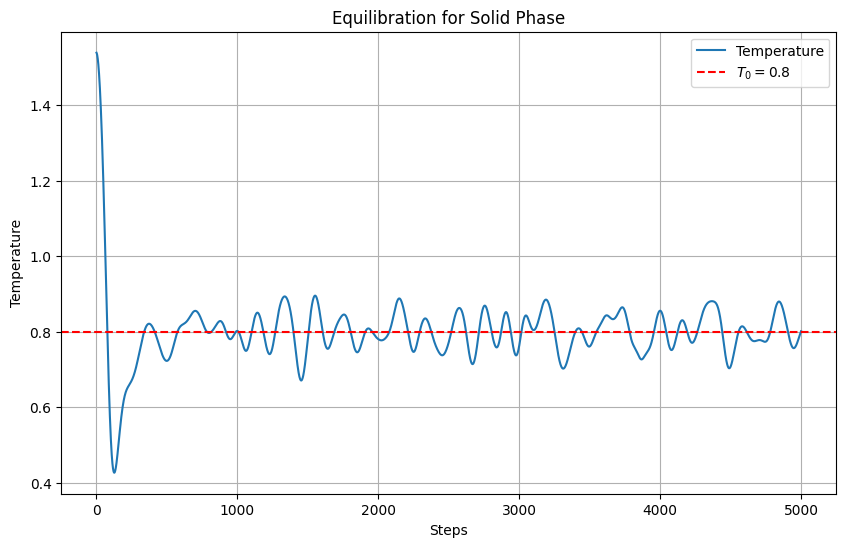

In [12]:
T0solid = 0.8
n, a = np.loadtxt("temperature_termal.dat", usecols=(0,1), unpack=True)

plt.figure(figsize=(10, 6))
plt.plot(n, a, label='Temperature')
plt.axhline(y=T0solid, color='r', linestyle='--', label='$T_0 = 0.8$')
#plt.xlim(0,2000) uncomment to see more precisely how many step we need

plt.xlabel('Steps')
plt.ylabel('Temperature')
plt.grid(True)
plt.title('Equilibration for Solid Phase')

plt.legend()
plt.show()

In the program, more than 300 steps are performed without taking measurements, and after these steps, the function SYS.block_reset(0) is used.

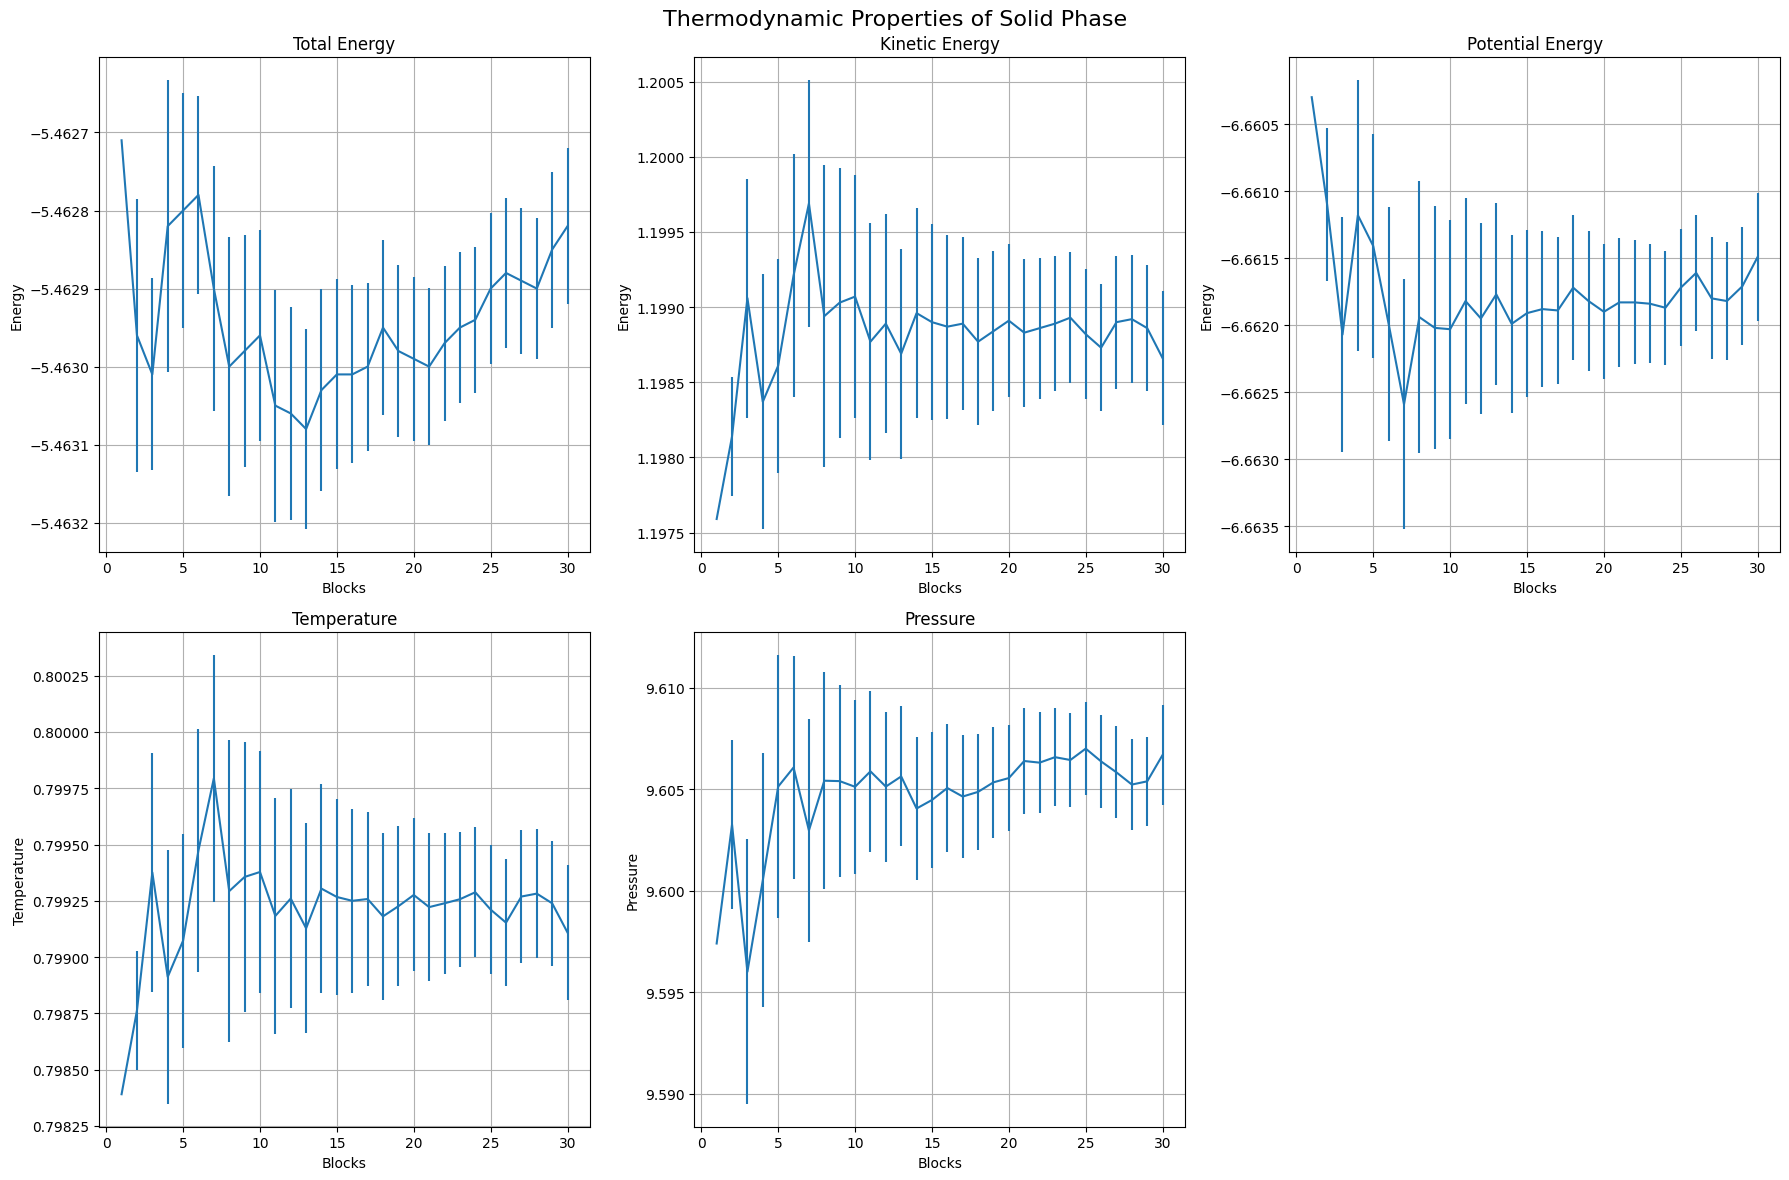

In [15]:
import numpy as np
import matplotlib.pyplot as plt

n, E, err_E = np.loadtxt("total_energy_solid.dat", usecols=(0,2,3), unpack=True)
n, K, err_K = np.loadtxt("kinetic_energy_solid.dat", usecols=(0,2,3), unpack=True)
n, P, err_P = np.loadtxt("potential_energy_solid.dat", usecols=(0,2,3), unpack=True)
n, T, err_T = np.loadtxt("temperature_solid.dat", usecols=(0,2,3), unpack=True) 
n, p, err_p = np.loadtxt("pressure_solid.dat", usecols=(0,2,3), unpack=True)

figure, axis = plt.subplots(2, 3, figsize=(18, 12))
figure.suptitle("Thermodynamic Properties of Solid Phase", fontsize=16)

axis[1,2].axis('off')

plots = [
    (axis[0,0], E, err_E, "Total Energy", "Energy"),
    (axis[0,1], K, err_K, "Kinetic Energy", "Energy"),
    (axis[0,2], P, err_P, "Potential Energy", "Energy"),
    (axis[1,0], T, err_T, "Temperature", "Temperature"),
    (axis[1,1], p, err_p, "Pressure", "Pressure")
]

for ax, data, err, title, ylabel in plots:
    ax.errorbar(n, data, yerr=err)
    ax.set_title(title)
    ax.set_xlabel("Blocks")
    ax.set_ylabel(ylabel)
    ax.grid(True)

plt.tight_layout()
plt.show()

## Liquid phase
From the graph below we can deduce that for the liquid phase the system needs around 400 steps starting from an initial temperature $T=1.99$

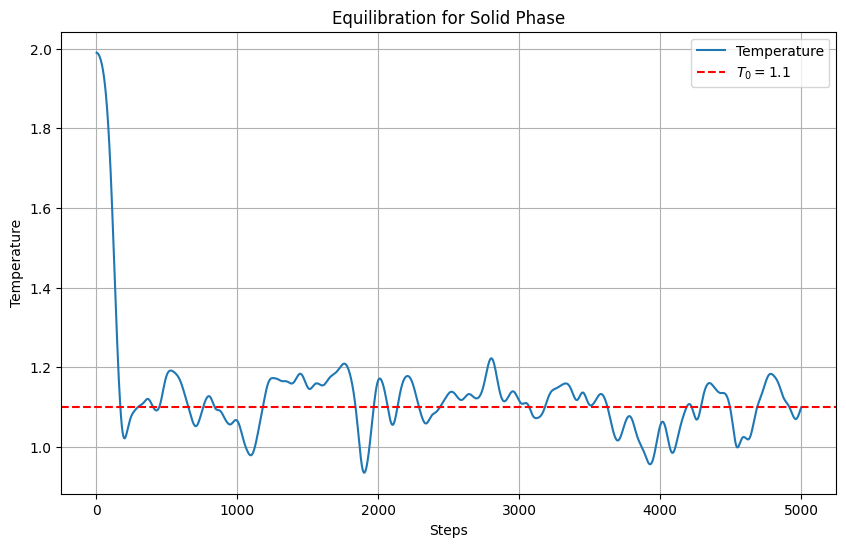

In [6]:
T0liquid = 1.1
n, a = np.loadtxt("temperature_termal_liquid.dat", usecols=(0,1), unpack=True)

plt.figure(figsize=(10, 6))
plt.plot(n, a, label='Temperature')
plt.axhline(y=T0liquid, color='r', linestyle='--', label='$T_0 = 1.1$')
#plt.xlim(0,2000) uncomment to see more precisely how many step we need

plt.xlabel('Steps')
plt.ylabel('Temperature')
plt.grid(True)
plt.title('Equilibration for Solid Phase')

plt.legend()
plt.show()

In the program, more than 400 steps are performed without taking measurements, and after these steps, the function SYS.block_reset(0) is used.

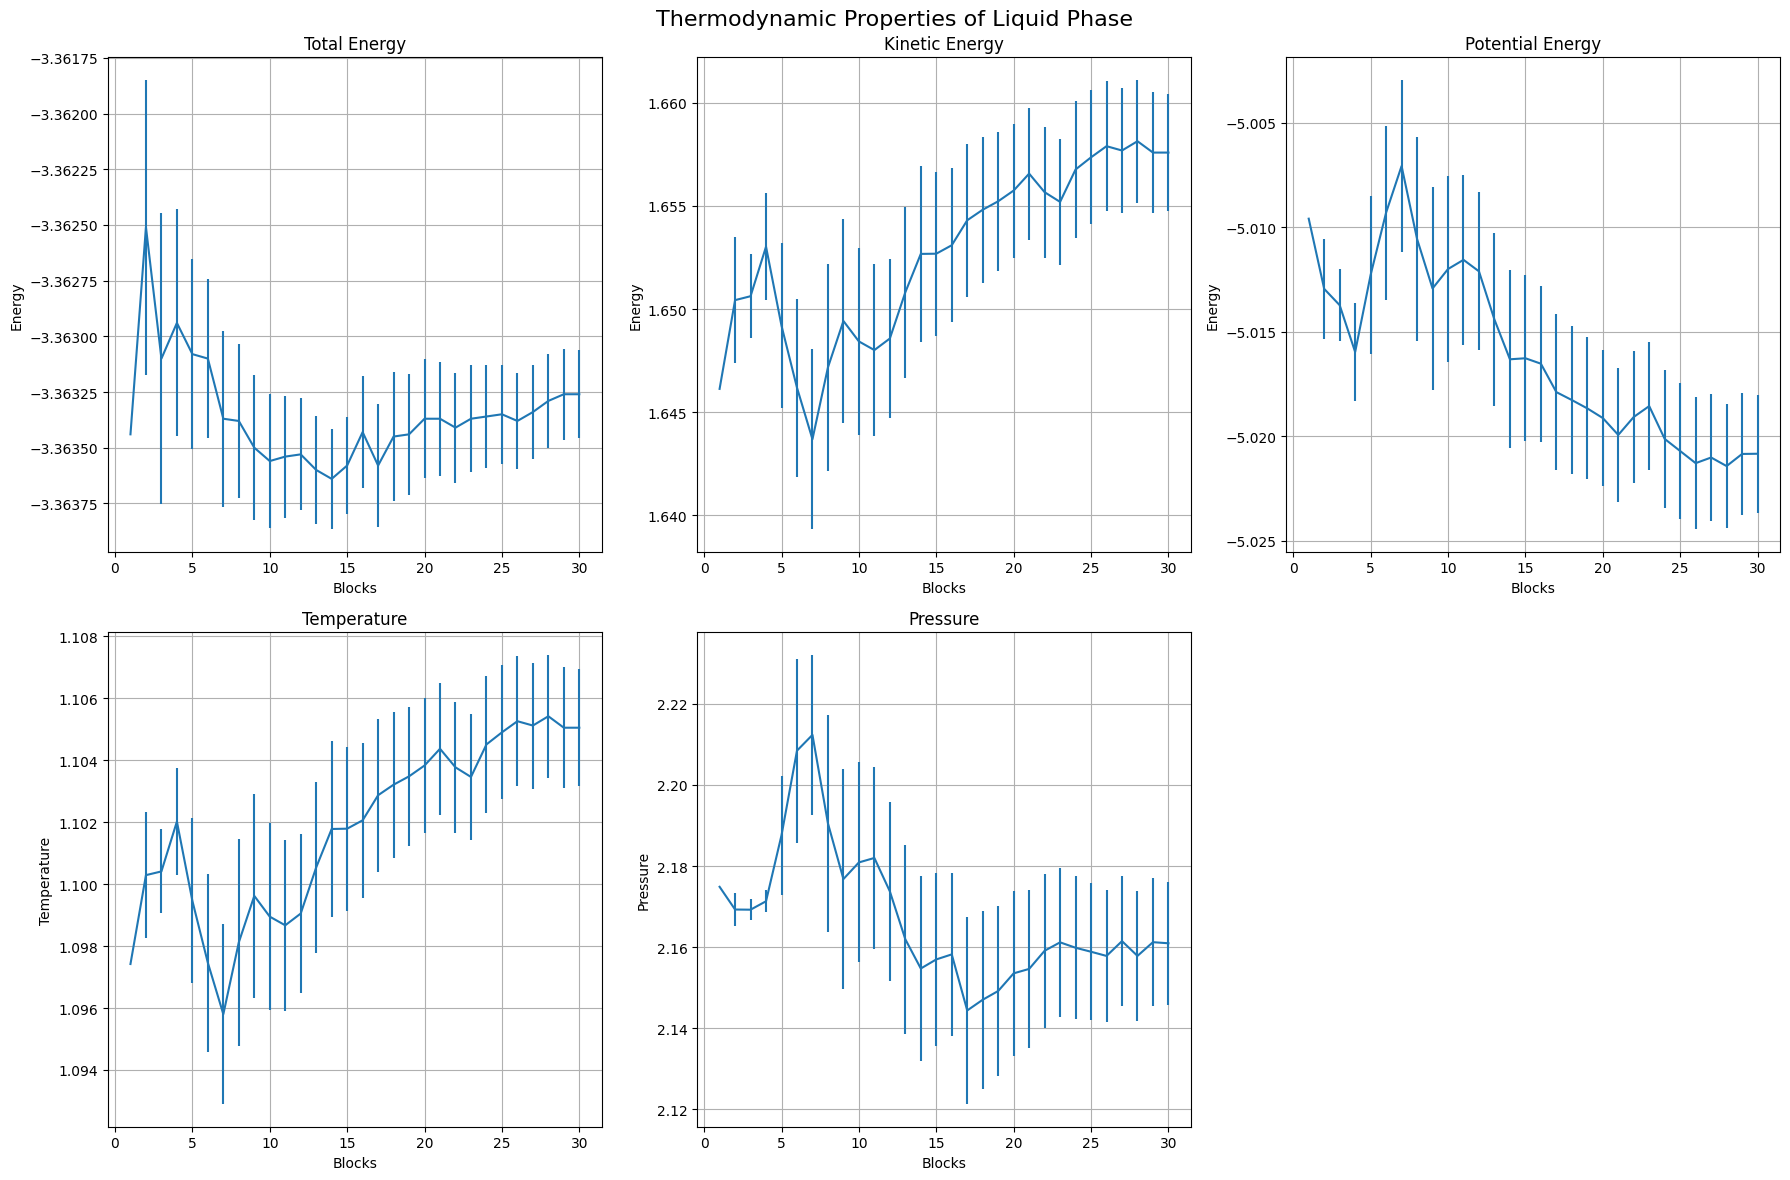

In [3]:
n, E, err_E = np.loadtxt("total_energy_liquid.dat", usecols=(0,2,3), unpack=True)
n, K, err_K = np.loadtxt("kinetic_energy_liquid.dat", usecols=(0,2,3), unpack=True)
n, P, err_P = np.loadtxt("potential_energy_liquid.dat", usecols=(0,2,3), unpack=True)
n, T, err_T = np.loadtxt("temperature_liquid.dat", usecols=(0,2,3), unpack=True) 
n, p, err_p = np.loadtxt("pressure_liquid.dat", usecols=(0,2,3), unpack=True)

figure, axis = plt.subplots(2, 3, figsize=(18, 12))
figure.suptitle("Thermodynamic Properties of Liquid Phase", fontsize=16)

axis[1,2].axis('off')

plots = [
    (axis[0,0], E, err_E, "Total Energy", "Energy"),
    (axis[0,1], K, err_K, "Kinetic Energy", "Energy"),
    (axis[0,2], P, err_P, "Potential Energy", "Energy"),
    (axis[1,0], T, err_T, "Temperature", "Temperature"),
    (axis[1,1], p, err_p, "Pressure", "Pressure")
]

for ax, data, err, title, ylabel in plots:
    ax.errorbar(n, data, yerr=err)
    ax.set_title(title)
    ax.set_xlabel("Blocks")
    ax.set_ylabel(ylabel)
    ax.grid(True)

plt.tight_layout()
plt.show()

## Gas phase
From the graph below we can deduce that for the gas phase we were able to reach a temperature $T=1.15$ in 5000 steps. 

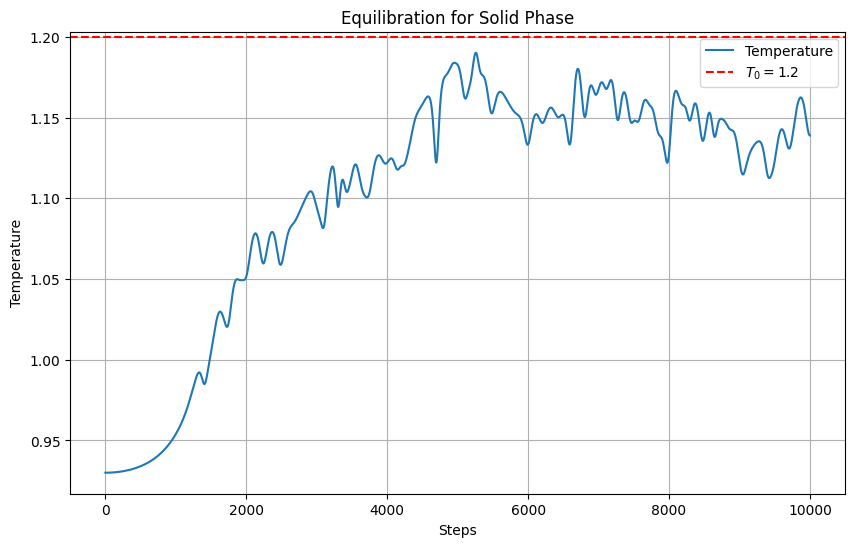

In [5]:
T0gas = 1.2
n, a = np.loadtxt("temperature_termal_gas.dat", usecols=(0,1), unpack=True)

plt.figure(figsize=(10, 6))
plt.plot(n, a, label='Temperature')
plt.axhline(y=T0gas, color='r', linestyle='--', label='$T_0 = 1.2$')
#plt.xlim(0,10000) uncomment to see more precisely how many step we need

plt.xlabel('Steps')
plt.ylabel('Temperature')
plt.grid(True)
plt.title('Equilibration for Solid Phase')

plt.legend()
plt.show()

In the program, more than 5000 steps are performed without taking measurements, and after these steps, the function SYS.block_reset(0) is used.

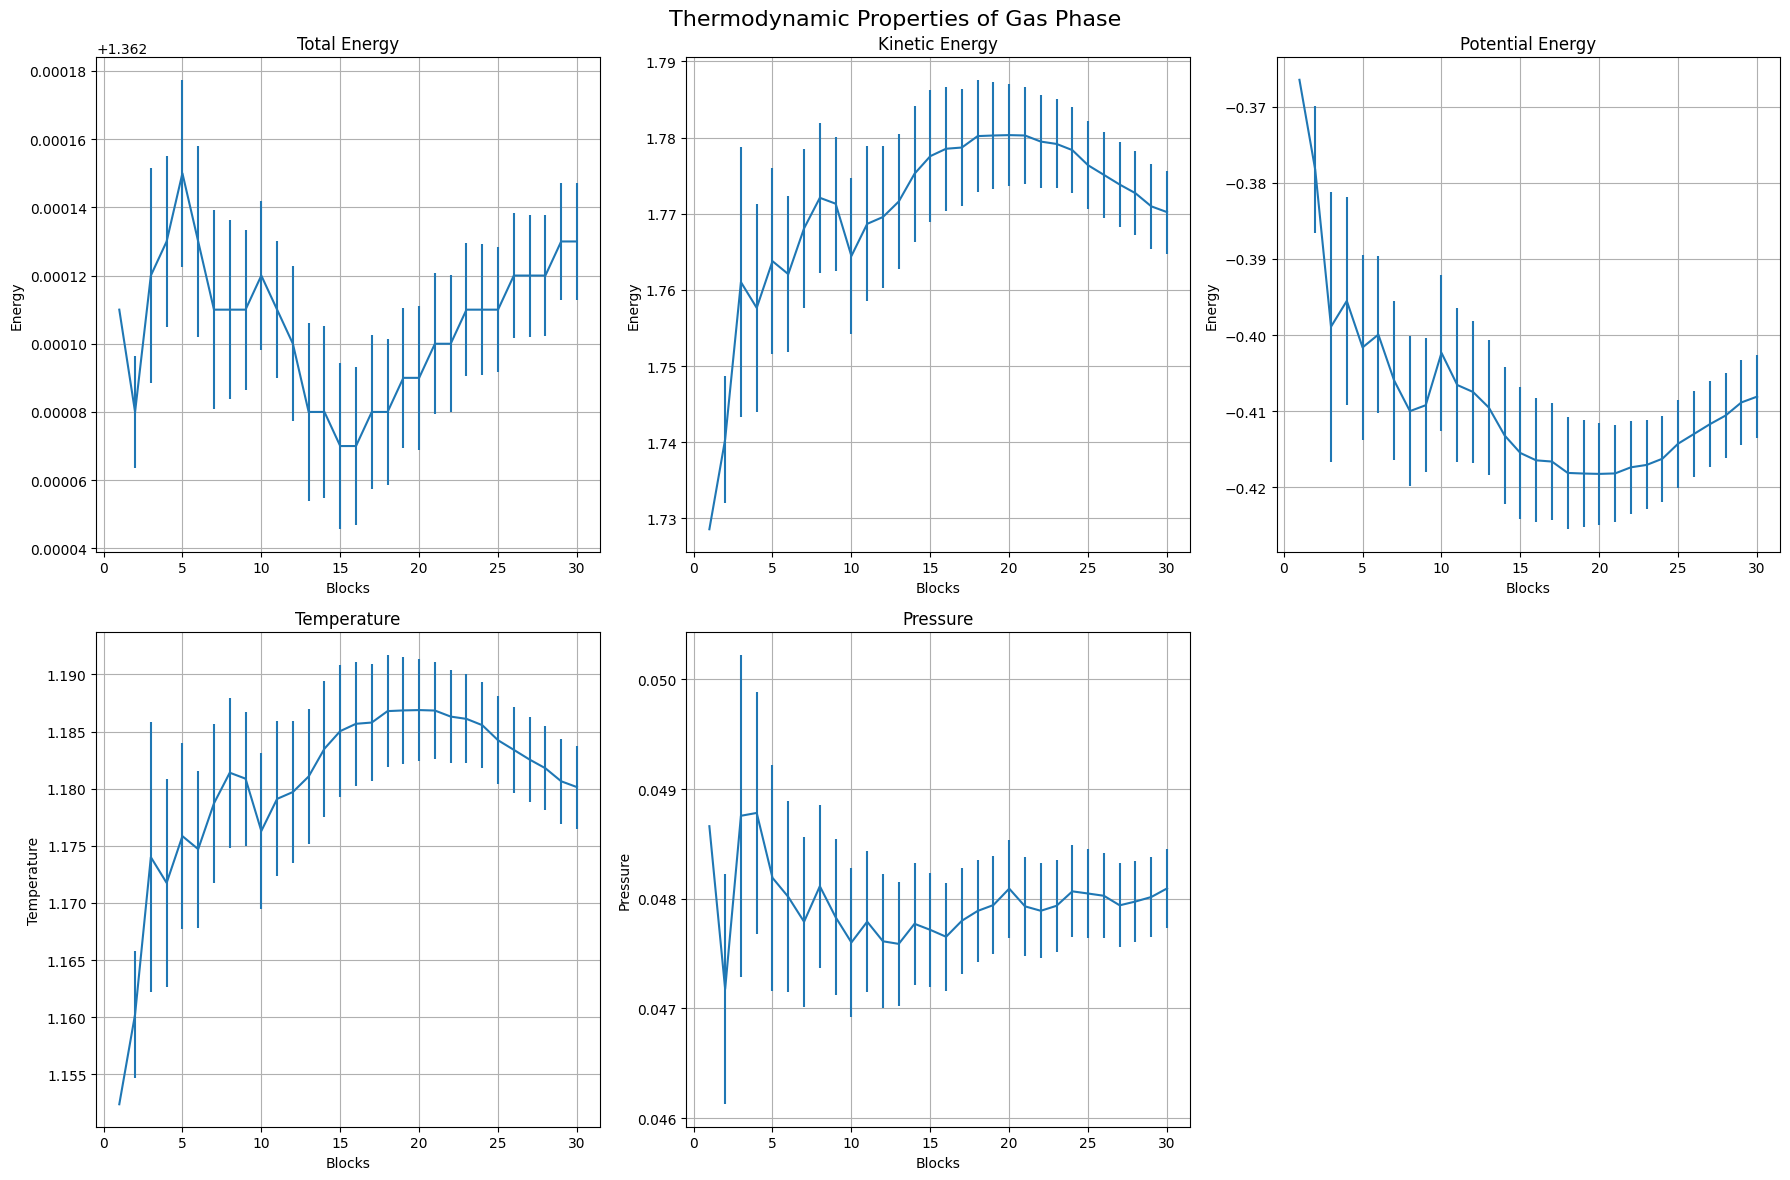

In [7]:
n, E, err_E = np.loadtxt("total_energy_gas.dat", usecols=(0,2,3), unpack=True)
n, K, err_K = np.loadtxt("kinetic_energy_gas.dat", usecols=(0,2,3), unpack=True)
n, P, err_P = np.loadtxt("potential_energy_gas.dat", usecols=(0,2,3), unpack=True)
n, T, err_T = np.loadtxt("temperature_gas.dat", usecols=(0,2,3), unpack=True) 
n, p, err_p = np.loadtxt("pressure_gas.dat", usecols=(0,2,3), unpack=True)

figure, axis = plt.subplots(2, 3, figsize=(18, 12))
figure.suptitle("Thermodynamic Properties of Gas Phase", fontsize=16)

axis[1,2].axis('off')

plots = [
    (axis[0,0], E, err_E, "Total Energy", "Energy"),
    (axis[0,1], K, err_K, "Kinetic Energy", "Energy"),
    (axis[0,2], P, err_P, "Potential Energy", "Energy"),
    (axis[1,0], T, err_T, "Temperature", "Temperature"),
    (axis[1,1], p, err_p, "Pressure", "Pressure")
]

for ax, data, err, title, ylabel in plots:
    ax.errorbar(n, data, yerr=err)
    ax.set_title(title)
    ax.set_xlabel("Blocks")
    ax.set_ylabel(ylabel)
    ax.grid(True)

plt.tight_layout()
plt.show()